# The Single Neuron Linear Regression Model

## 1. Original Data Plot

We will focus on **linear regression**. This specific case of regression assumes that the *target values in $\mathcal{Y}$ are approximated by a linear function of the associated feature vectors*. That is, the optimal target function $f:\mathcal{X} \rightarrow \mathcal{Y}$ is assumed the be roughly a linear function. 

Many types of problems and data fall into this roughly linear relationship. For example, one could reasonably suspect that such a relationship exists when considering the iris dataset setosa species sepal length as feature measurements together with the iris dataset setosa species sepal width as targets. This can be verified by visualizing the data. Examine the figure generated by running the following code in the cell below.

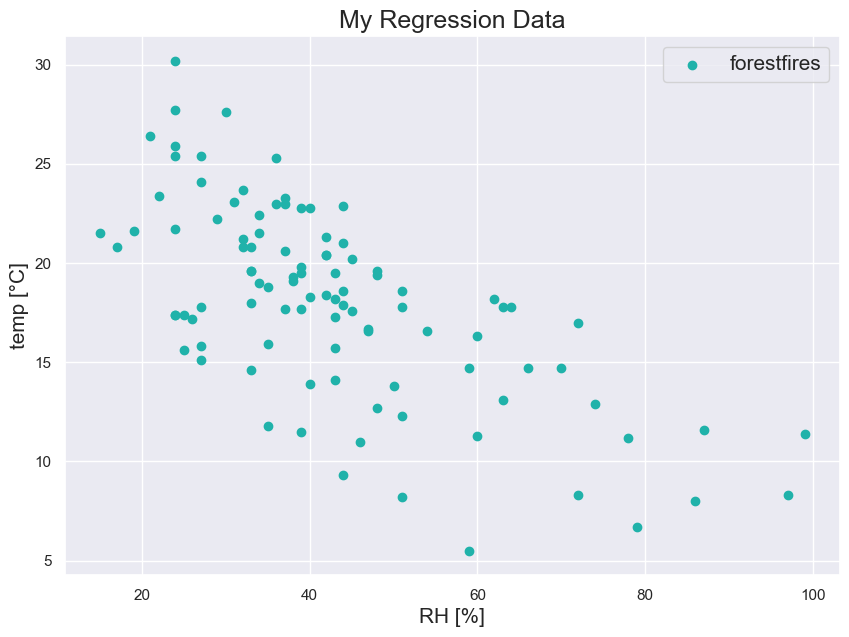

In [156]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

df = pd.read_csv("Datasets/forestfires.csv")
df = df.iloc[:100][["RH","temp"]]
plt.figure(figsize = (10, 7))
plt.scatter(df.RH, 
            df.temp, 
            color = "lightseagreen",
            label = "forestfires")
plt.xlabel("RH [%]", fontsize = 15)
plt.ylabel("temp [°C]", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()


## 2 Linear Regression Single Neuron Model

we wish to solve the following optimization problem:

$$
\min_{w_1, b}C(w_1, b)
$$

Since $C(w_1, b)$ is a differentiable function of both $w_1$ and $b$, we may attempt to solve this minimization problem by applying the gradient descent algorithm:

$$
w_1 \leftarrow w_1 - \alpha \frac{\partial C}{\partial w_1}
$$

$$
b \leftarrow b - \alpha \frac{\partial C}{\partial b}
$$

In order to implement the gradient descent method we first need to understand how the partial derivatives of $C(w_1, b)$ are calculated over the training data at hand. With this in mind, suppose for now that we are calculating the mean-sqaured error cost function on a *single example* example of data, i.e., $N = 1$. For this single example we observe that the mean-sqaured error cost function becomes: 

$$
C(w, b; \mathbf{x}^{(i)}, y^{(i)}) = \frac{1}{2}\Big(\hat{y}^{(i)} - y^{(i)}\Big)^2. 
$$

In the case of a linear activation function, it is important to note that $\hat{y}^{(i)}$ is a very simple function of both $w_1$ and $b$. More specifically, we observe:

$$
\hat{y}^{(i)} = a = z = w_1x^{(i)} + b. 
$$

Thus, we may rewrite our neuron cost function with a single observation:

$$
C(w, b; \mathbf{x}^{(i)}, y^{(i)}) = \frac{1}{2}\Big(w_1x^{(i)} + b - y^{(i)}\Big)^2. 
$$

With this equation, we can calculate $\partial C/ \partial w_1$ and $\partial C/ \partial b$ easily by applying the [chain rule (click for a quick refresher on the concept)](https://www.youtube.com/watch?v=HaHsqDjWMLU). The resulting partial derivatives with respect to $w_1$ and $b$ shown by the following equations:

1. $\frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial w_1} = (w_1x^{(i)} + b - y^{(i)})x^{(i)} = (\hat{y}^{(i)} - y^{(i)})x^{(i)}$
2. $\frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial b} = (w_1x^{(i)} + b - y^{(i)}) = (\hat{y}^{(i)} - y^{(i)})$

Understanding the different ways in which we may calculate the partial derivatives of our cost function is essential in applying any *first-order* minimization technique on the cost function $C(w_1, b)$. With what follows we discuss two of the three fundamental methods used to accomplish this goal. 

In [182]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha, epochs)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha, epochs):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                errors += .5*(error**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


In [158]:
X = df.RH.values
X = X.reshape(-1, 1)
y = df.temp.values

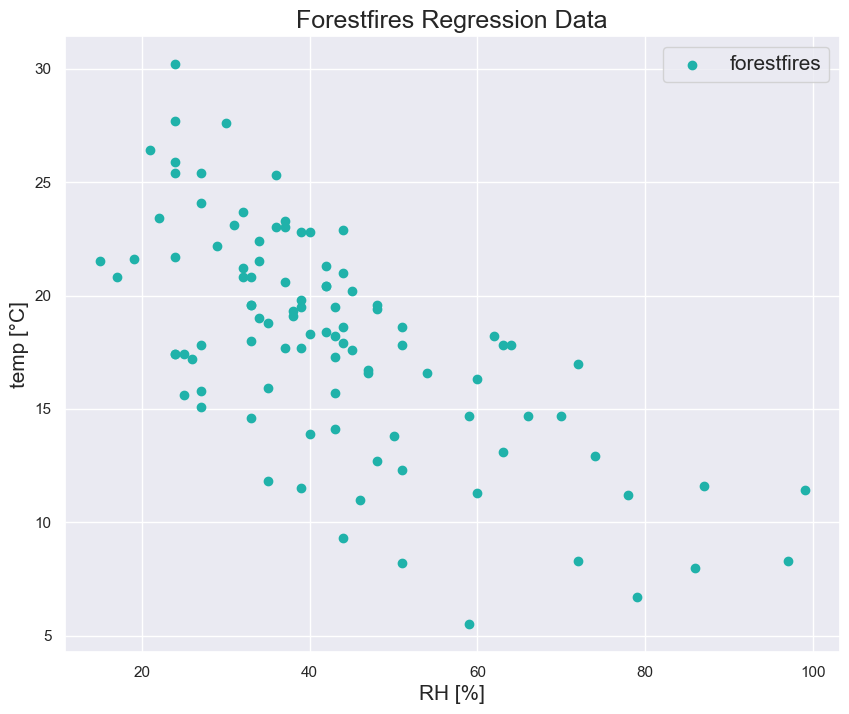

In [233]:
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "forestfires")
plt.xlabel("RH [%]", fontsize = 15)
plt.ylabel("temp [°C]", fontsize = 15)
plt.title("Forestfires Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

In [234]:
def linear_activation(z):
    return z

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

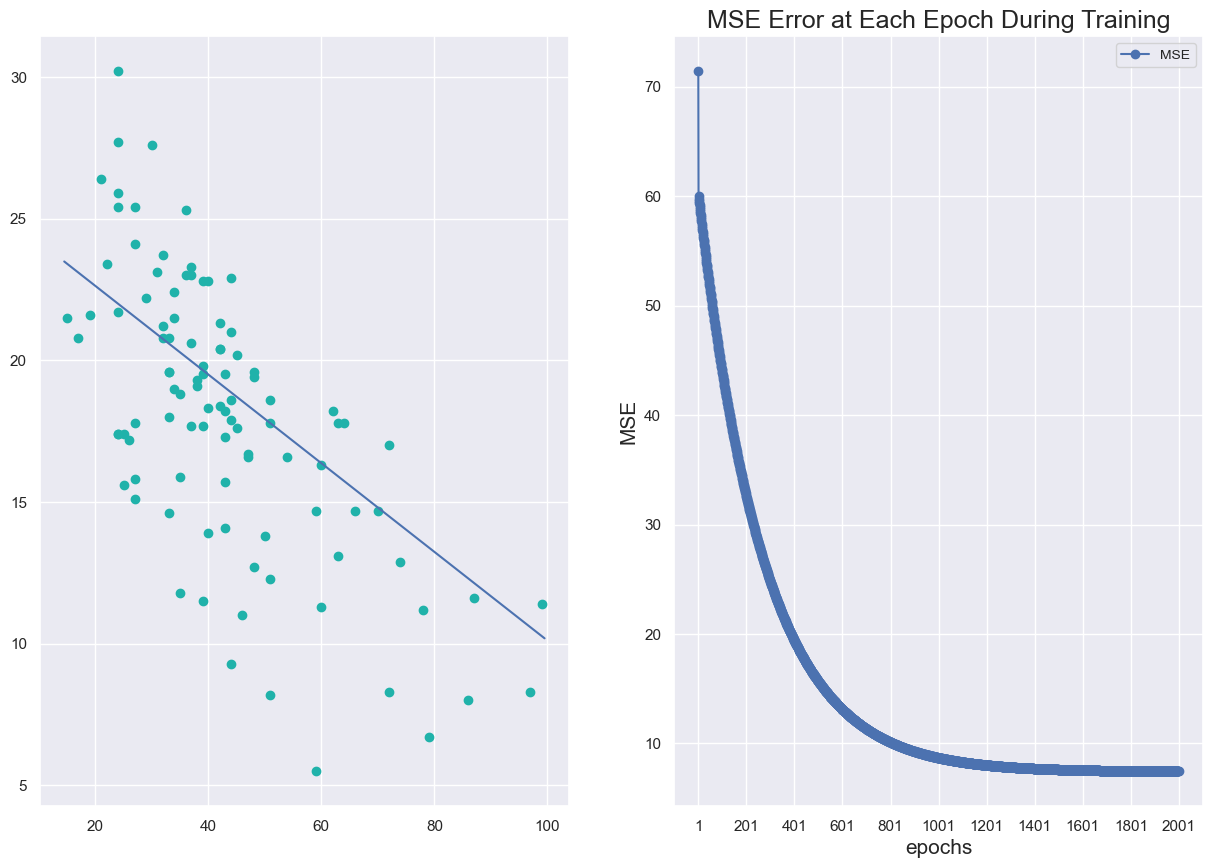

In [235]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .00015, epochs = 2000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("RH [%]", fontsize = 15)
plt.ylabel("temp [°C]", fontsize = 15)
plt.title("Forestfires Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 2, 200))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)


## 3. Experiment with the Learning Rate 

As discussed in a previous notebook, the choice of learning rate is a crucial *hyperparamter* when implementing gradient (and stochastic gradient) descent. We can view different choices of learning rate with a fixed number of epochs by running the following code in the cell below.

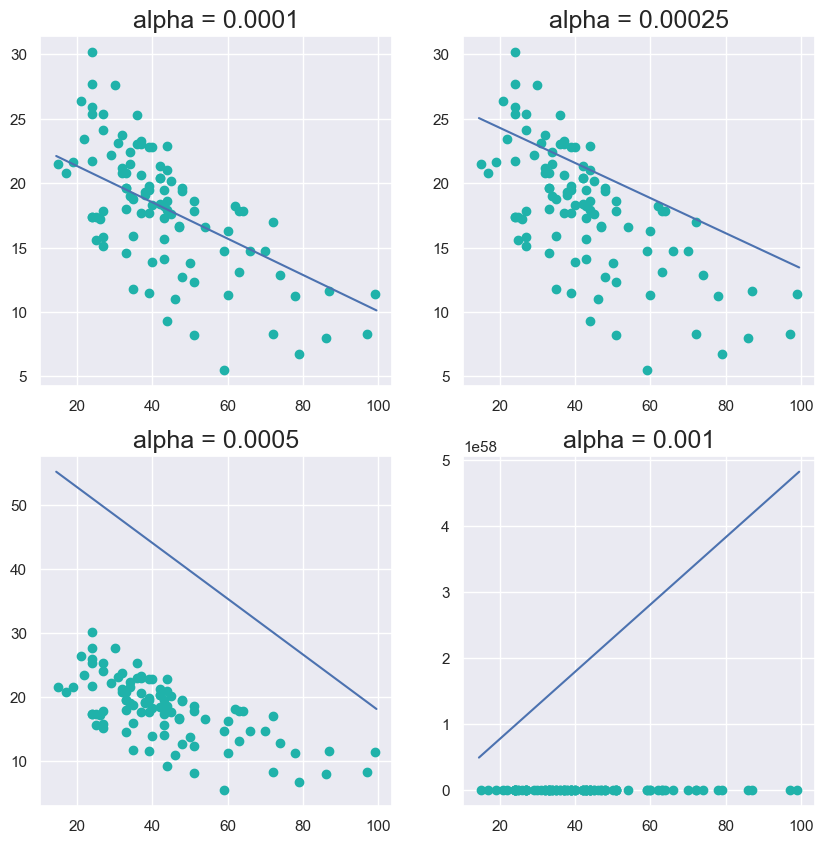

In [181]:
# Possible choices of learning rate 
alphas = [0.0001, 0.00025, 0.0005, 0.001]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 2000)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)